In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as colors
import matplotlib as mpl
import copy
from matplotlib.colors import  ListedColormap
from matplotlib.colors import DivergingNorm
from matplotlib.colors import from_levels_and_colors

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 
#store = '/chinook/cruman/Data/WetSnow'
#auxPlot = f'/{store}/WetSnow_SN_200010-200012.nc'
#auxPlot = xr.open_dataset(auxPlot)
#auxPlot['S_Events'] = (('south_north', 'west_east'), b)
#auxPlot['S_EventsAVG'] = (('south_north', 'west_east'), b/12)

In [5]:
pr = '_pr02'
#pr = ''
sim = ''
p1_pr, p2_pr, p3_pr, p4_pr = readData(sim, pr)
sim = '_PGW'
p1_pgw_pr, p2_pgw_pr, p3_pgw_pr, p4_pgw_pr = readData(sim, pr)

pr = ''
sim = ''
p1, p2, p3, p4 = readData(sim, pr)
sim = '_PGW'
p1_pgw, p2_pgw, p3_pgw, p4_pgw = readData(sim, pr)


Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156
Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156
Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156
Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [4]:
def readData(sim, pr):
    
    fo = '/chinook/cruman/Data/Near0Events'
    # Get the average number of hours near 0
    p1 = np.zeros((14,12,1015,1359))
    p2 = np.zeros((14,12,1015,1359))
    p3 = np.zeros((14,12,1015,1359))
    p4 = np.zeros((14,12,1015,1359))
    # Year, Month, Lat, Lon
    #for m in range(1,13):
    #    l.append([])
    t = 0
    for i,y in enumerate(range(2000,2014)):
        print(f"Ano {i}")
        for m in range(1,13):
            if y == 2000 and m < 10:
                continue
            if y == 2013 and m > 9:
                continue
            #print(f"Mes: {m}, Ano: {y}")
            aux_1 = pickle.load( open(f'{fo}/pathway1{pr}{sim}_{y}_{m:02d}.p', 'rb'))
            aux_2 = pickle.load( open(f'{fo}/pathway2{pr}{sim}_{y}_{m:02d}.p', 'rb'))
            aux_3 = pickle.load( open(f'{fo}/pathway3{pr}{sim}_{y}_{m:02d}.p', 'rb'))
            aux_4 = pickle.load( open(f'{fo}/pathway4{pr}{sim}_{y}_{m:02d}.p', 'rb'))
            #print(f'{fo}/t2m_{y}_{m:02d}.p')
            p1[i,m-1] += aux_1
            p2[i,m-1] += aux_2
            p3[i,m-1] += aux_3
            p4[i,m-1] += aux_4
            t+= 1
            #sys.exit()
            #print(i, m-1)
            #d_array[m-1].append(aux)
            
    print(f"Total # of months: {t}")        
    
    return p1, p2, p3, p4

In [6]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

In [18]:
usmask = xr.open_dataset('/home/cruman/Data/ShapeFiles/us_mask.nc', engine='netcdf4')

In [19]:
# Month 12 yearly total
p1_month = np.sum(p1, axis=0)
p2_month = np.sum(p2, axis=0)
p3_month = np.sum(p3, axis=0)
p4_month = np.sum(p4, axis=0)
# Annual yearly average total of hours
p1_total = removeCorners(np.sum(p1_month, axis=0))
p2_total = removeCorners(np.sum(p2_month, axis=0))
p3_total = removeCorners(np.sum(p3_month, axis=0))
p4_total = removeCorners(np.sum(p4_month, axis=0))

p1_total[usmask.mask_array.values == 1] = np.nan
p2_total[usmask.mask_array.values == 1] = np.nan
p3_total[usmask.mask_array.values == 1] = np.nan
p4_total[usmask.mask_array.values == 1] = np.nan

aux1['avg_p1'] = (('south_north', 'west_east'), p1_total/13)
aux1['avg_p2'] = (('south_north', 'west_east'), p2_total/13)
aux1['avg_p3'] = (('south_north', 'west_east'), p3_total/13)
aux1['avg_p4'] = (('south_north', 'west_east'), p4_total/13)

for i in range(0,12):
    aux1[f'p1_month_{i:02d}'] = (('south_north', 'west_east'), p1_month[i,:,:]/13)
    aux1[f'p2_month_{i:02d}'] = (('south_north', 'west_east'), p2_month[i,:,:]/13)
    aux1[f'p3_month_{i:02d}'] = (('south_north', 'west_east'), p3_month[i,:,:]/13)
    aux1[f'p4_month_{i:02d}'] = (('south_north', 'west_east'), p4_month[i,:,:]/13)

In [20]:
# Month 12 yearly total
p1_month = np.sum(p1_pr, axis=0)
p2_month = np.sum(p2_pr, axis=0)
p3_month = np.sum(p3_pr, axis=0)
p4_month = np.sum(p4_pr, axis=0)
# Annual yearly average total of hours
p1_total = removeCorners(np.sum(p1_month, axis=0))
p2_total = removeCorners(np.sum(p2_month, axis=0))
p3_total = removeCorners(np.sum(p3_month, axis=0))
p4_total = removeCorners(np.sum(p4_month, axis=0))

p1_total[usmask.mask_array.values == 1] = np.nan
p2_total[usmask.mask_array.values == 1] = np.nan
p3_total[usmask.mask_array.values == 1] = np.nan
p4_total[usmask.mask_array.values == 1] = np.nan

aux1['avg_p1_pr'] = (('south_north', 'west_east'), p1_total/13)
aux1['avg_p2_pr'] = (('south_north', 'west_east'), p2_total/13)
aux1['avg_p3_pr'] = (('south_north', 'west_east'), p3_total/13)
aux1['avg_p4_pr'] = (('south_north', 'west_east'), p4_total/13)

for i in range(0,12):
    aux1[f'p1_month_{i:02d}_pr'] = (('south_north', 'west_east'), p1_month[i,:,:]/13)
    aux1[f'p2_month_{i:02d}_pr'] = (('south_north', 'west_east'), p2_month[i,:,:]/13)
    aux1[f'p3_month_{i:02d}_pr'] = (('south_north', 'west_east'), p3_month[i,:,:]/13)
    aux1[f'p4_month_{i:02d}_pr'] = (('south_north', 'west_east'), p4_month[i,:,:]/13)

In [21]:
# Month 12 yearly total
p1_month = np.sum(p1_pgw, axis=0)
p2_month = np.sum(p2_pgw, axis=0)
p3_month = np.sum(p3_pgw, axis=0)
p4_month = np.sum(p4_pgw, axis=0)
# Annual yearly average total of hours
p1_total = removeCorners(np.sum(p1_month, axis=0))
p2_total = removeCorners(np.sum(p2_month, axis=0))
p3_total = removeCorners(np.sum(p3_month, axis=0))
p4_total = removeCorners(np.sum(p4_month, axis=0))

p1_total[usmask.mask_array.values == 1] = np.nan
p2_total[usmask.mask_array.values == 1] = np.nan
p3_total[usmask.mask_array.values == 1] = np.nan
p4_total[usmask.mask_array.values == 1] = np.nan

aux1['avg_p1_pgw'] = (('south_north', 'west_east'), p1_total/13)
aux1['avg_p2_pgw'] = (('south_north', 'west_east'), p2_total/13)
aux1['avg_p3_pgw'] = (('south_north', 'west_east'), p3_total/13)
aux1['avg_p4_pgw'] = (('south_north', 'west_east'), p4_total/13)

for i in range(0,12):
    aux1[f'p1_month_{i:02d}_pgw'] = (('south_north', 'west_east'), p1_month[i,:,:]/13)
    aux1[f'p2_month_{i:02d}_pgw'] = (('south_north', 'west_east'), p2_month[i,:,:]/13)
    aux1[f'p3_month_{i:02d}_pgw'] = (('south_north', 'west_east'), p3_month[i,:,:]/13)
    aux1[f'p4_month_{i:02d}_pgw'] = (('south_north', 'west_east'), p4_month[i,:,:]/13)

In [22]:
# Month 12 yearly total
p1_month = np.sum(p1_pgw_pr, axis=0)
p2_month = np.sum(p2_pgw_pr, axis=0)
p3_month = np.sum(p3_pgw_pr, axis=0)
p4_month = np.sum(p4_pgw_pr, axis=0)
# Annual yearly average total of hours
p1_total = removeCorners(np.sum(p1_month, axis=0))
p2_total = removeCorners(np.sum(p2_month, axis=0))
p3_total = removeCorners(np.sum(p3_month, axis=0))
p4_total = removeCorners(np.sum(p4_month, axis=0))

p1_total[usmask.mask_array.values == 1] = np.nan
p2_total[usmask.mask_array.values == 1] = np.nan
p3_total[usmask.mask_array.values == 1] = np.nan
p4_total[usmask.mask_array.values == 1] = np.nan

aux1['avg_p1_pgw_pr'] = (('south_north', 'west_east'), p1_total/13)
aux1['avg_p2_pgw_pr'] = (('south_north', 'west_east'), p2_total/13)
aux1['avg_p3_pgw_pr'] = (('south_north', 'west_east'), p3_total/13)
aux1['avg_p4_pgw_pr'] = (('south_north', 'west_east'), p4_total/13)

for i in range(0,12):
    aux1[f'p1_month_{i:02d}_pgw_pr'] = (('south_north', 'west_east'), p1_month[i,:,:]/13)
    aux1[f'p2_month_{i:02d}_pgw_pr'] = (('south_north', 'west_east'), p2_month[i,:,:]/13)
    aux1[f'p3_month_{i:02d}_pgw_pr'] = (('south_north', 'west_east'), p3_month[i,:,:]/13)
    aux1[f'p4_month_{i:02d}_pgw_pr'] = (('south_north', 'west_east'), p4_month[i,:,:]/13)

In [41]:
def getMaxValues(var1, var2, var3, var4, aux1):
    p1 = aux1[var1].values[25:-25,25:-25]
    p2 = aux1[var2].values[25:-25,25:-25]
    p3 = aux1[var3].values[25:-25,25:-25]
    p4 = aux1[var4].values[25:-25,25:-25]
    
    a = np.stack((p1,p2,p3,p4))
    
    maxValues = np.argmax(a, axis=0)
    
    return maxValues.astype(float)

def plotPathwayMax(filename, varname, title):
    myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

    # Making the subplots
    f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

    width = 1.0  

    val_max = 5 #np.max(aux1['total_day'].values)
    val_min = 1
    val_int = 1
    #new_cmap = plt.cm.jet
    cor = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
    cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
    new_cmap = mpl.colors.ListedColormap(cor)
    unit = ""
    #title = r"Test"


    ints = ( (val_max-val_min+val_int) / val_int)
    color_bnds  = np.linspace(val_min, val_max, int(ints))
    color_ticks = np.linspace(val_min, val_max, int(ints))
    norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=4)
    # Plot figure

    #cs = aux1['possibilities_p12'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
    #           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max)
    cs = plt.contourf(new_XLONG, new_XLAT, varname+1.5, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
                   add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, norm=norm)
    #cs = maxCTRL
    # Plot colorbar
    cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
    cb.ax.set_title(unit, fontsize=30)
    cb.ax.tick_params(labelsize=30) 
    cb.set_ticks(color_ticks)
    #cb.ax.set_xticklabels(['Pathway1', 'Pathway2', 'Pathway3', 'Pathway4', ' '])

    # Plot title
    ax.set_title(title, fontsize=30)

    ax.coastlines(resolution='50m', linewidth=width, zorder=11)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=11)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    ax.add_feature(cfeature.OCEAN, zorder=10)
    ax.add_feature(cfeature.LAKES, zorder=10)

    #ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
    ax.set_extent([xll-3.5, xur-9, 38.6, yur+2])

    plt.savefig(filename, facecolor='white', bbox_inches='tight')
    #plt.show()

In [24]:
new_XLONG = aux1.XLONG.values[25:-25, 25:-25]
new_XLAT = aux1.XLAT.values[25:-25, 25:-25]

In [42]:
# Getting the maximum value of each location
# All values
# CTRL
maxCTRL = getMaxValues('avg_p1', 'avg_p2', 'avg_p3', 'avg_p4', aux1)
maxCTRL[usmask.mask_array.values[25:-25, 25:-25] == 1] = np.nan
# PGW
maxPGW = getMaxValues('avg_p1_pgw', 'avg_p2_pgw', 'avg_p3_pgw', 'avg_p4_pgw', aux1)
maxPGW[usmask.mask_array.values[25:-25, 25:-25] == 1] = np.nan
# with precip
# CTRL
maxCTRL_PR = getMaxValues('avg_p1_pr', 'avg_p2_pr', 'avg_p3_pr', 'avg_p4_pr', aux1)
maxCTRL_PR[usmask.mask_array.values[25:-25, 25:-25] == 1] = np.nan
# PGW
maxPGW_PR = getMaxValues('avg_p1_pgw_pr', 'avg_p2_pgw_pr', 'avg_p3_pgw_pr', 'avg_p4_pgw_pr', aux1)
maxPGW_PR[usmask.mask_array.values[25:-25, 25:-25] == 1] = np.nan

In [87]:
maxCTRL[0,-1] = 5

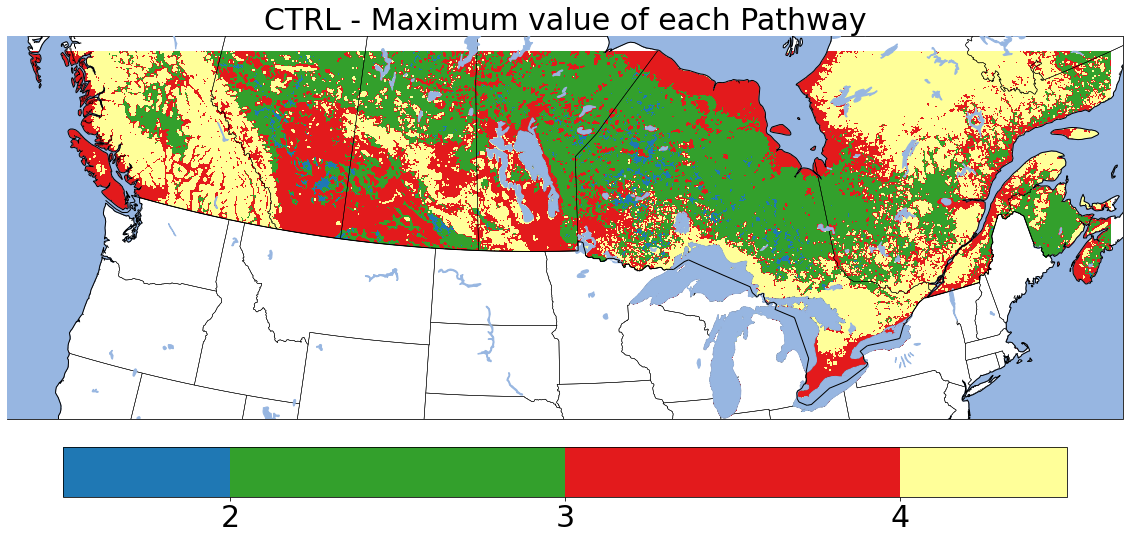

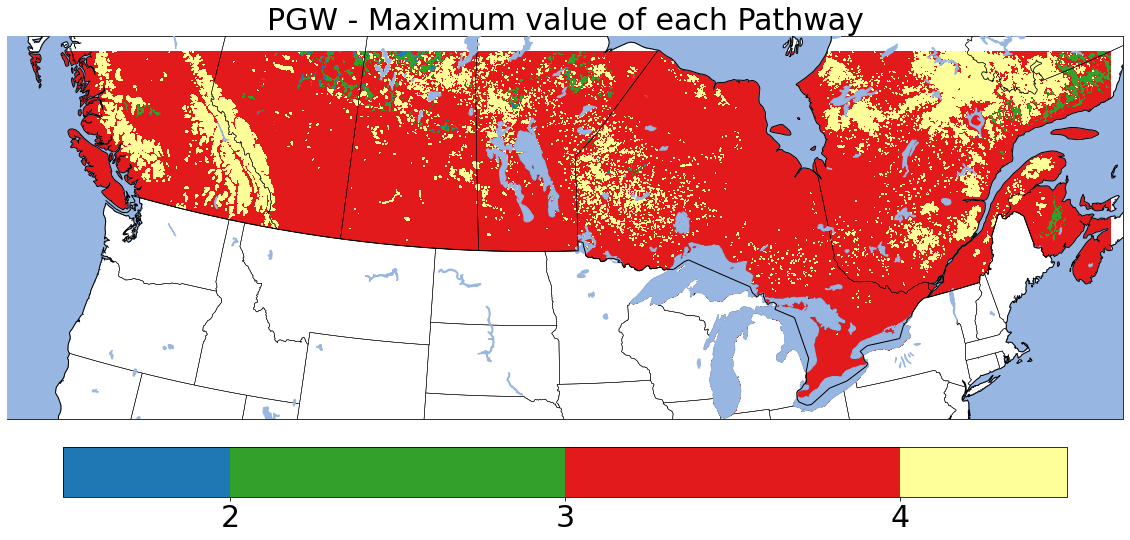

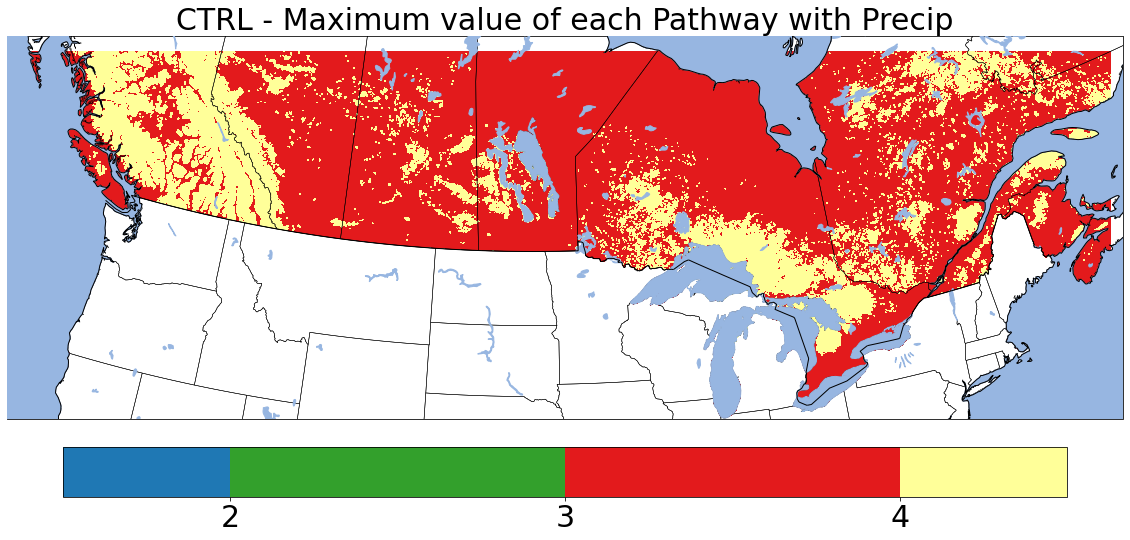

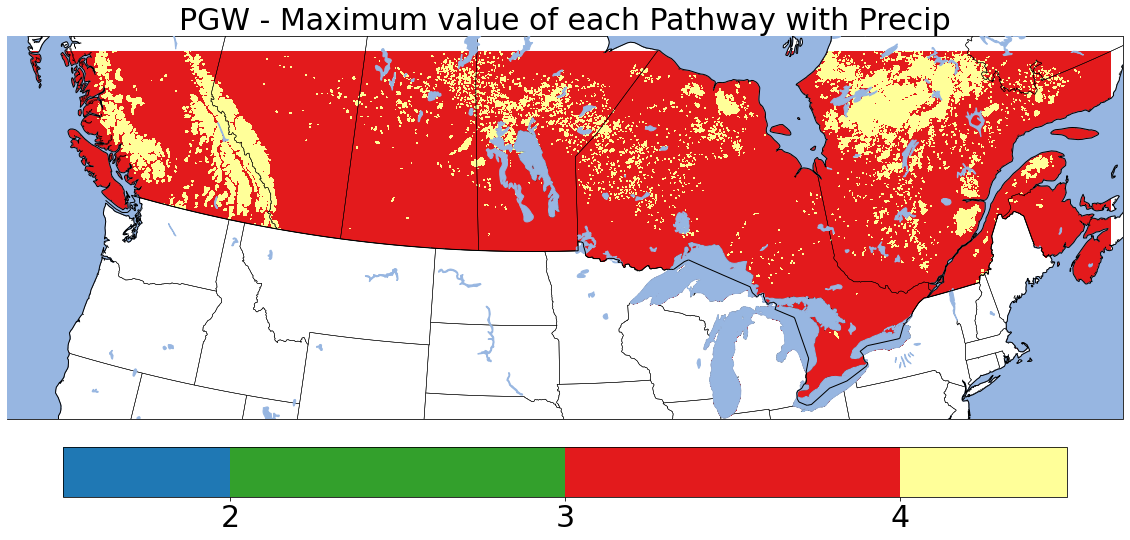

In [44]:
# Making the plots
plotPathwayMax('CTRL_allvalues2.png', maxCTRL, 'CTRL - Maximum value of each Pathway')
plotPathwayMax('PGW_allvalues.png', maxPGW, 'PGW - Maximum value of each Pathway')
plotPathwayMax('CTRL_PRvalues.png', maxCTRL_PR, 'CTRL - Maximum value of each Pathway with Precip')
plotPathwayMax('PGW_PRvalues.png', maxPGW_PR, 'PGW - Maximum value of each Pathway with Precip')

<ipython-input-113-43512e5631d8>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


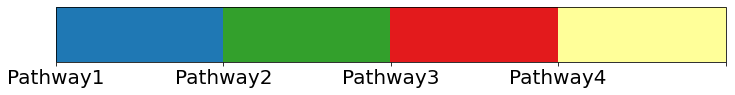

In [113]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 2))
fig.subplots_adjust(bottom=0.5)

#cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=new_cmap,
                                norm=norm,
                                orientation='horizontal')

cb1.ax.set_xticklabels(['Pathway1', 'Pathway2', 'Pathway3', 'Pathway4', ' '])
cb1.ax.tick_params(labelsize=20) 
fig.show()

In [ ]:
color_ticks

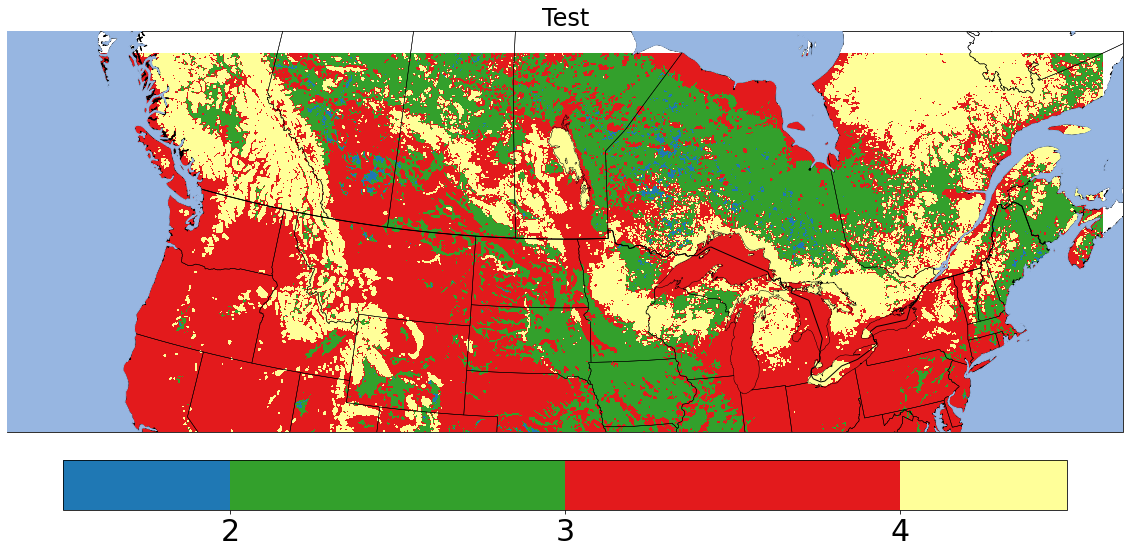

In [105]:
# Possibilities - P1 and P2
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

val_max = 5 #np.max(aux1['total_day'].values)
val_min = 1
val_int = 1
#new_cmap = plt.cm.jet
cor = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)
unit = ""
title = r"Test"


ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=4)
# Plot figure

#cs = aux1['possibilities_p12'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max)
cs = plt.contourf(new_XLONG, new_XLAT, maxCTRL+1.5, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
               add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, norm=norm)
#cs = maxCTRL
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30) 
cb.set_ticks(color_ticks)
#cb.ax.set_xticklabels(['Pathway1', 'Pathway2', 'Pathway3', 'Pathway4', ' '])

# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
ax.add_feature(cfeature.OCEAN, zorder=10)

ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

plt.savefig('test.png')
#plt.show()

In [31]:
aux1['avg_total'] = (('south_north', 'west_east'), (p1_total+p2_total+p3_total+p4_total)/13)

In [20]:
geo_idx([45.5, -76.6], np.array([aux1.XLAT, aux1.XLONG]))

[714, 1087]

In [77]:
geo_idx([40.012722015380859,-86.049835205078125], np.array([aux1.XLAT, aux1.XLONG]))

[532, 928]

In [32]:
# Fixing a weird bug
aux1.avg_p1[532,675] = 5.1
aux1.avg_p2[532, 928] = 40.770
aux1.avg_p2_pgw[532, 928] = 25.779

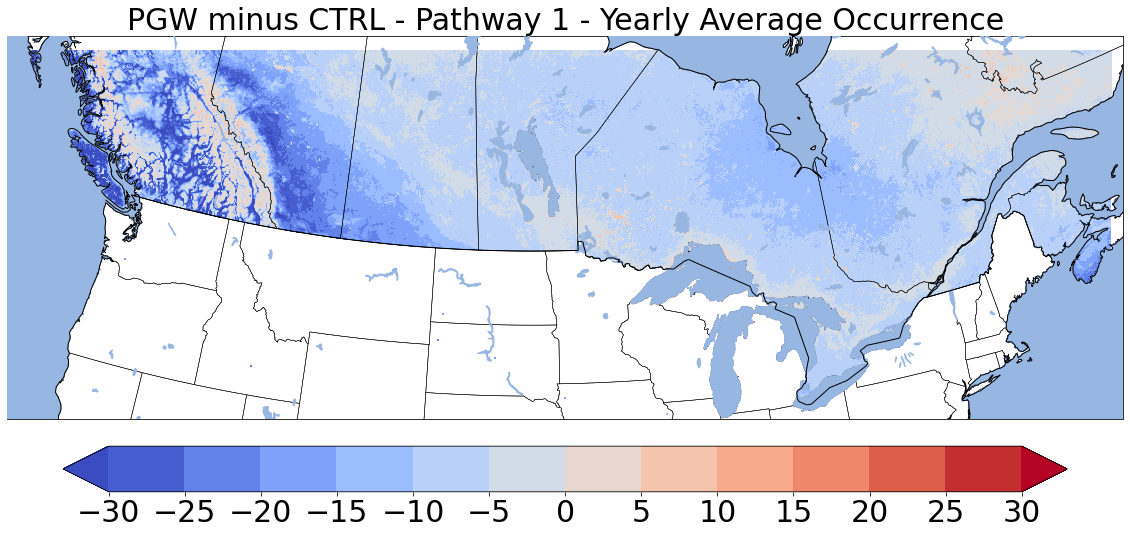

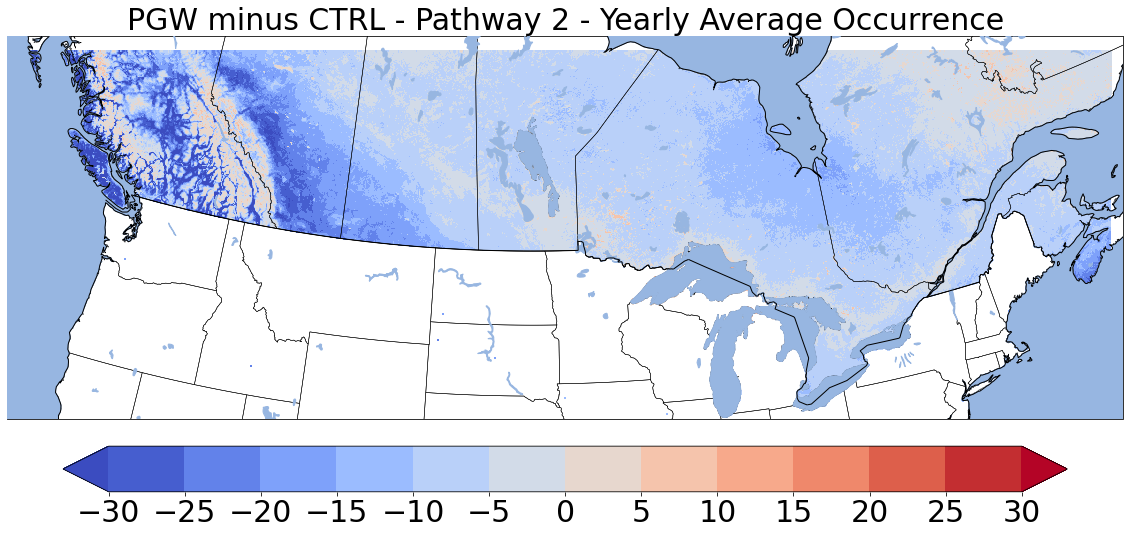

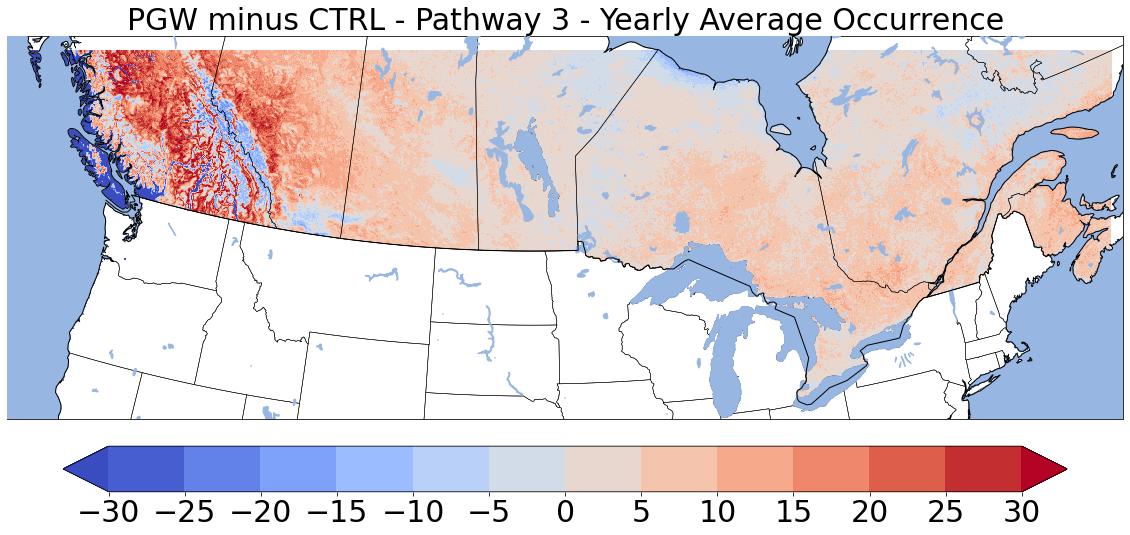

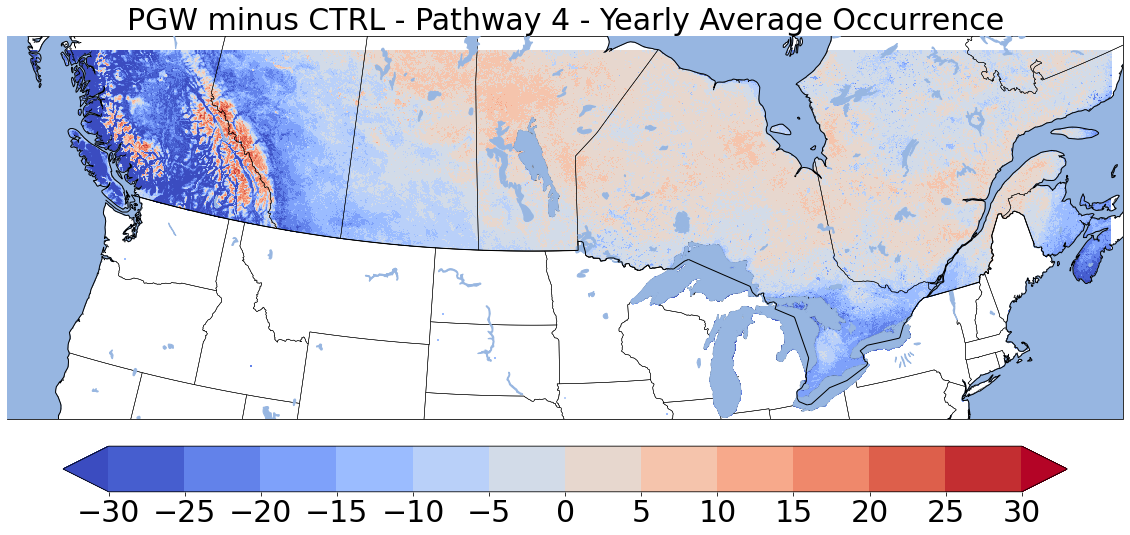

In [28]:
# Plot the differences between the 4 pathways
vmax=30
vmin=-30
inc=13
plotPathwayDiff(f'p1_diff_pgw_minus_ctrl_v2_avg.png', 'avg_p1', 'avg_p1_pgw', vmax, vmin, inc, 'PGW minus CTRL - Pathway 1 - Yearly Average Occurrence', '')
plotPathwayDiff(f'p2_diff_pgw_minus_ctrl_v2_avg.png', 'avg_p2', 'avg_p2_pgw', vmax, vmin, inc, 'PGW minus CTRL - Pathway 2 - Yearly Average Occurrence', '')
plotPathwayDiff(f'p3_diff_pgw_minus_ctrl_v2_avg.png', 'avg_p3', 'avg_p3_pgw', vmax, vmin, inc, 'PGW minus CTRL - Pathway 3 - Yearly Average Occurrence', '')
plotPathwayDiff(f'p4_diff_pgw_minus_ctrl_v2_avg.png', 'avg_p4', 'avg_p4_pgw', vmax, vmin, inc, 'PGW minus CTRL - Pathway 4 - Yearly Average Occurrence', '')

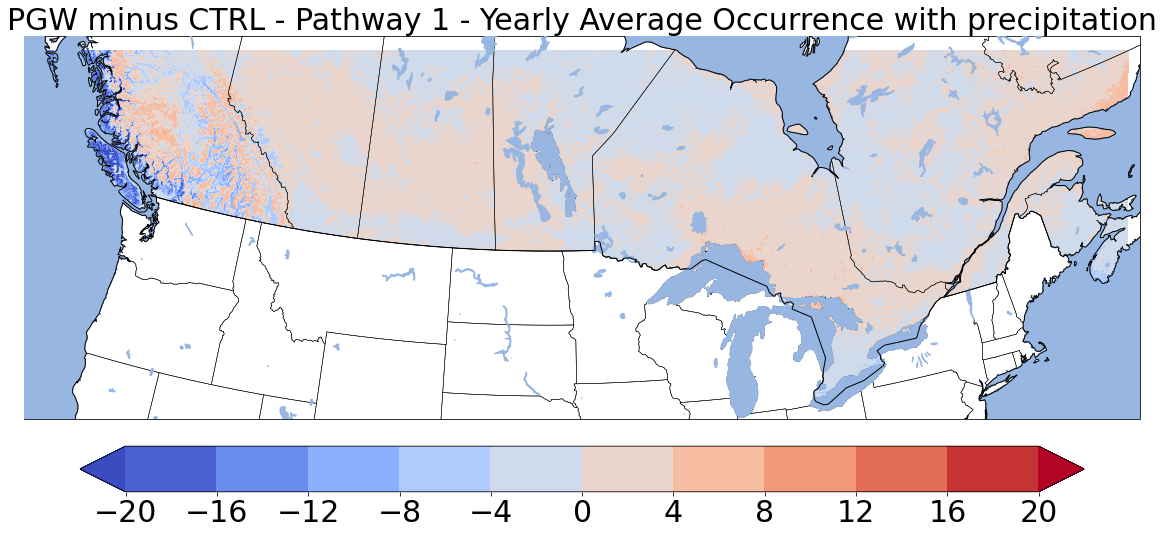

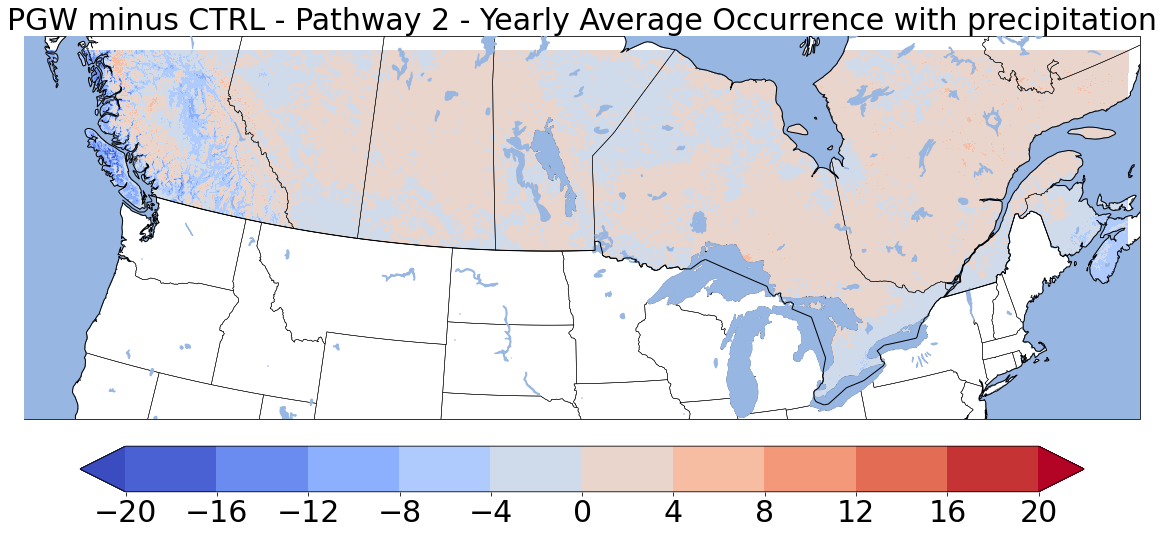

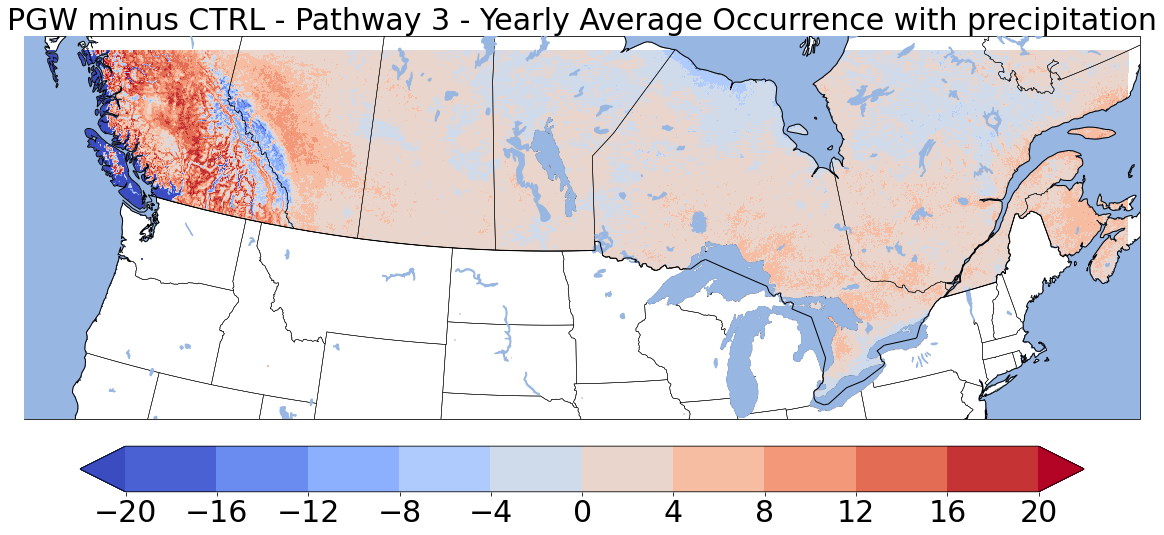

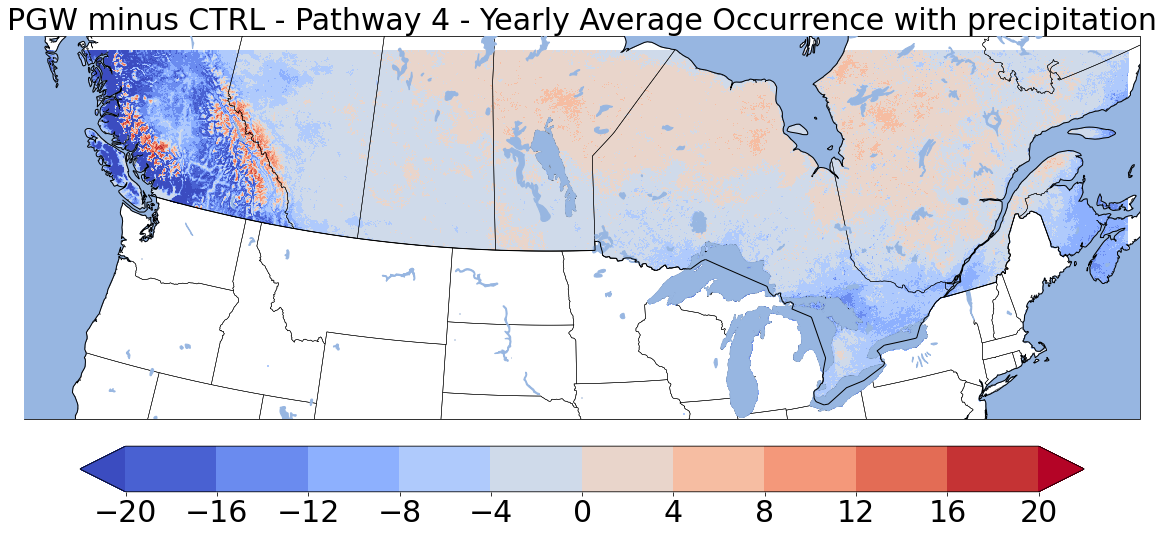

In [29]:
# Plot the differences between the 4 pathways
vmax=20
vmin=-20
inc=11
plotPathwayDiff(f'p1_diff_pgw_minus_ctrl_avg_pr_v2.png', 'avg_p1_pr', 'avg_p1_pgw_pr', vmax, vmin, inc, 'PGW minus CTRL - Pathway 1 - Yearly Average Occurrence with precipitation', '')
plotPathwayDiff(f'p2_diff_pgw_minus_ctrl_avg_pr_v2.png', 'avg_p2_pr', 'avg_p2_pgw_pr', vmax, vmin, inc, 'PGW minus CTRL - Pathway 2 - Yearly Average Occurrence with precipitation', '')
plotPathwayDiff(f'p3_diff_pgw_minus_ctrl_avg_pr_v2.png', 'avg_p3_pr', 'avg_p3_pgw_pr', vmax, vmin, inc, 'PGW minus CTRL - Pathway 3 - Yearly Average Occurrence with precipitation', '')
plotPathwayDiff(f'p4_diff_pgw_minus_ctrl_avg_pr_v2.png', 'avg_p4_pr', 'avg_p4_pgw_pr', vmax, vmin, inc, 'PGW minus CTRL - Pathway 4 - Yearly Average Occurrence with precipitation', '')

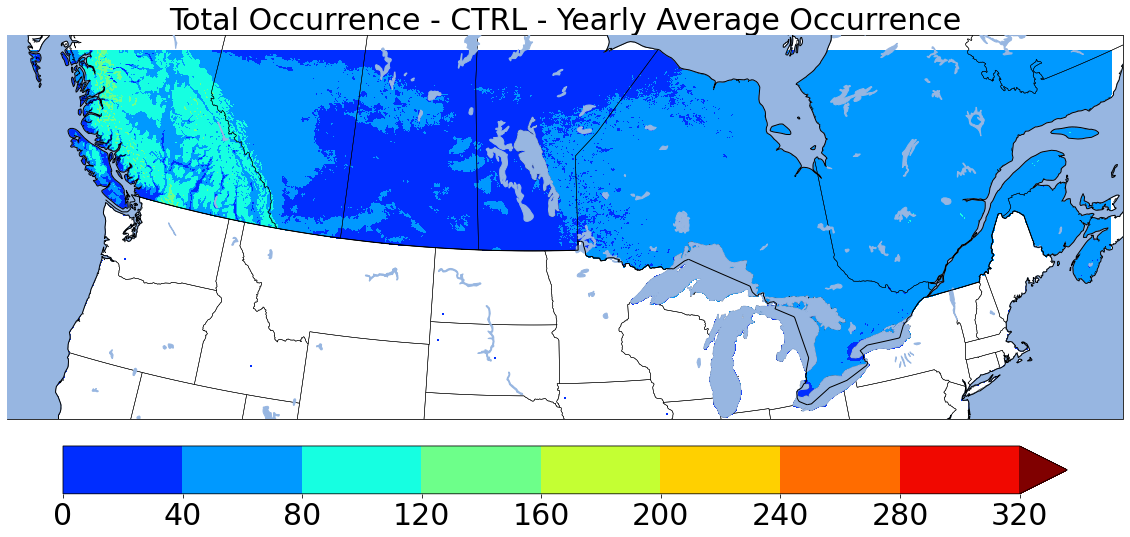

In [33]:
vmin = 0
vmax = 320
inc = 40
sim = '_PGW'
sim = '_CTRL'
plotPathway(f'total_{pr}{sim}_avg_v2.png', 'avg_total', vmax, vmin, inc, 'Total Occurrence - CTRL - Yearly Average Occurrence', '')

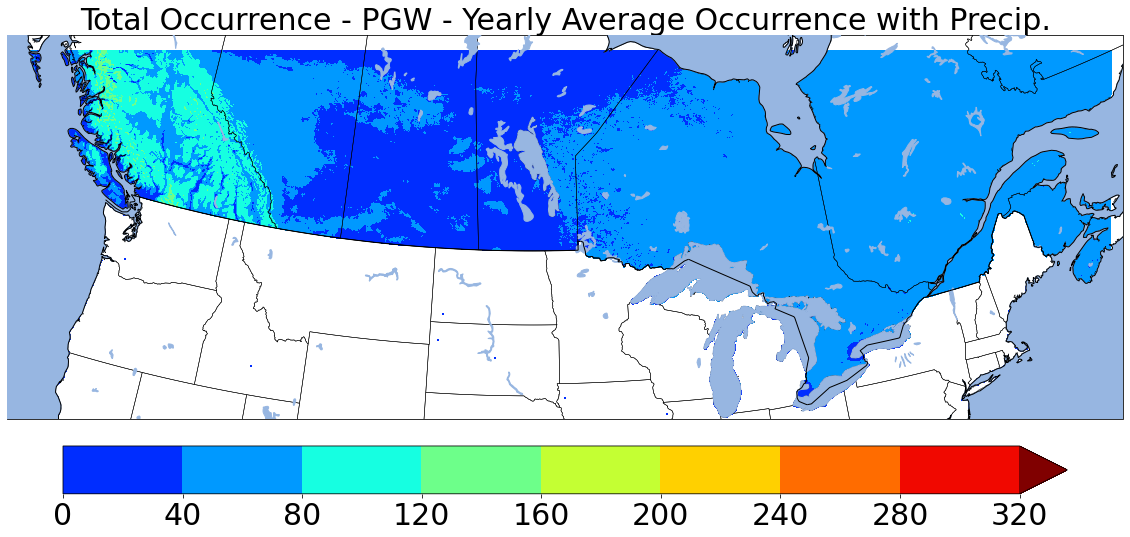

In [34]:
vmin = 0
vmax = 320
inc = 40
sim = '_PGW'
#sim = '_CTRL'
plotPathway(f'total_{pr}{sim}_avg_v2.png', 'avg_total', vmax, vmin, inc, 'Total Occurrence - PGW - Yearly Average Occurrence with Precip.', '')

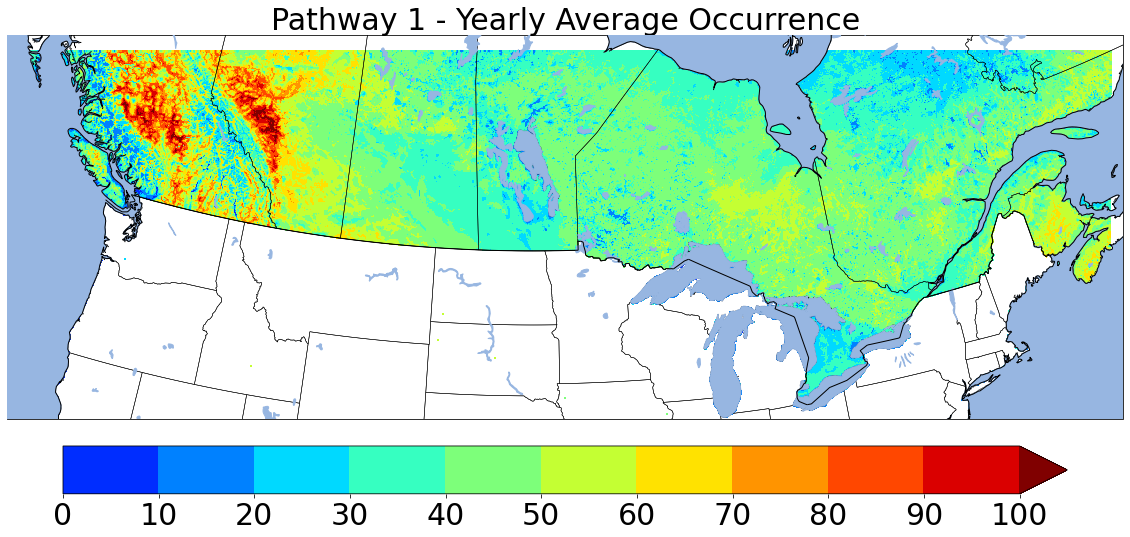

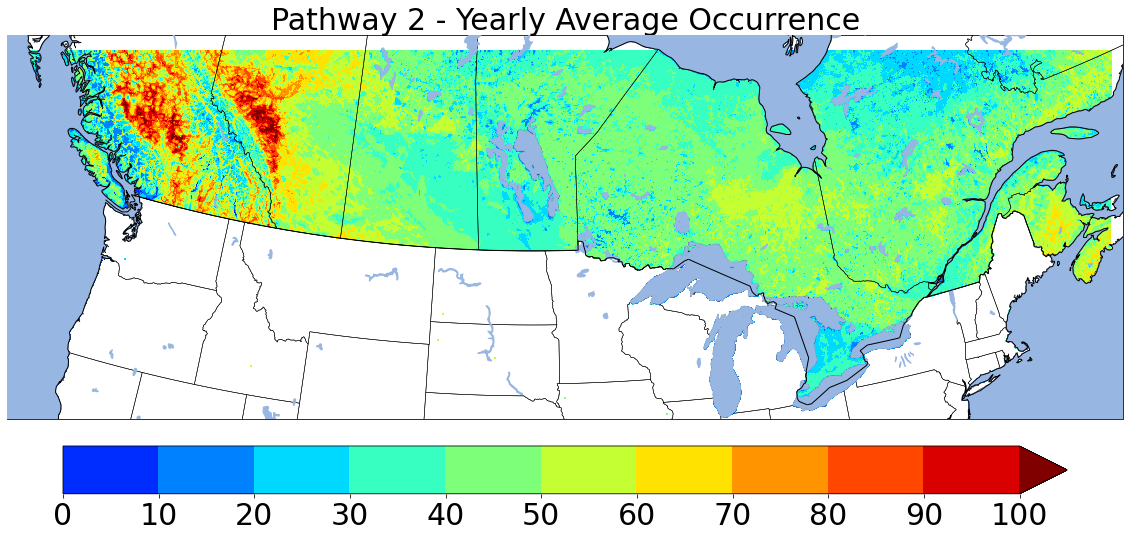

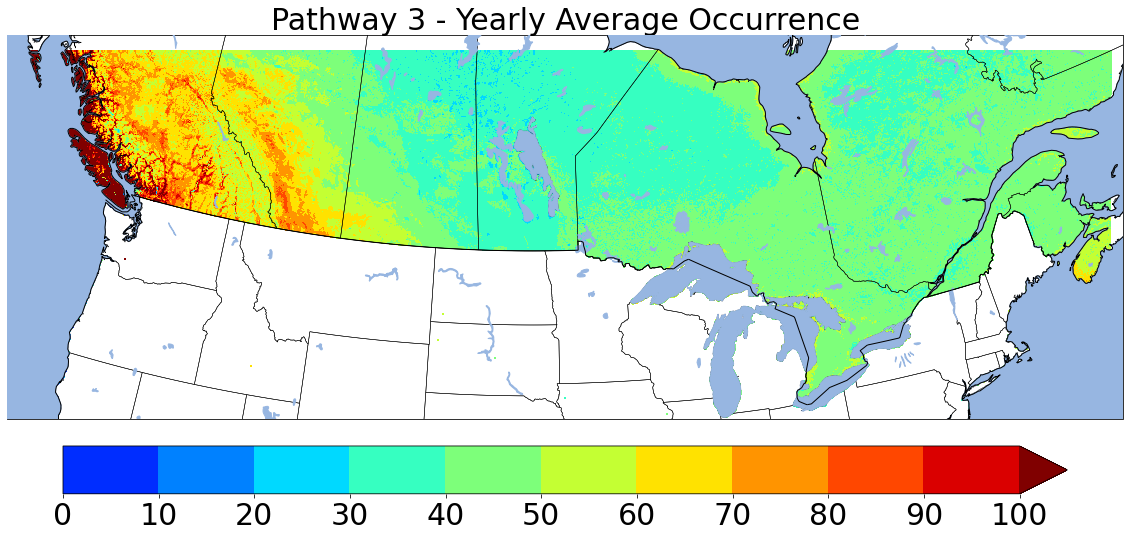

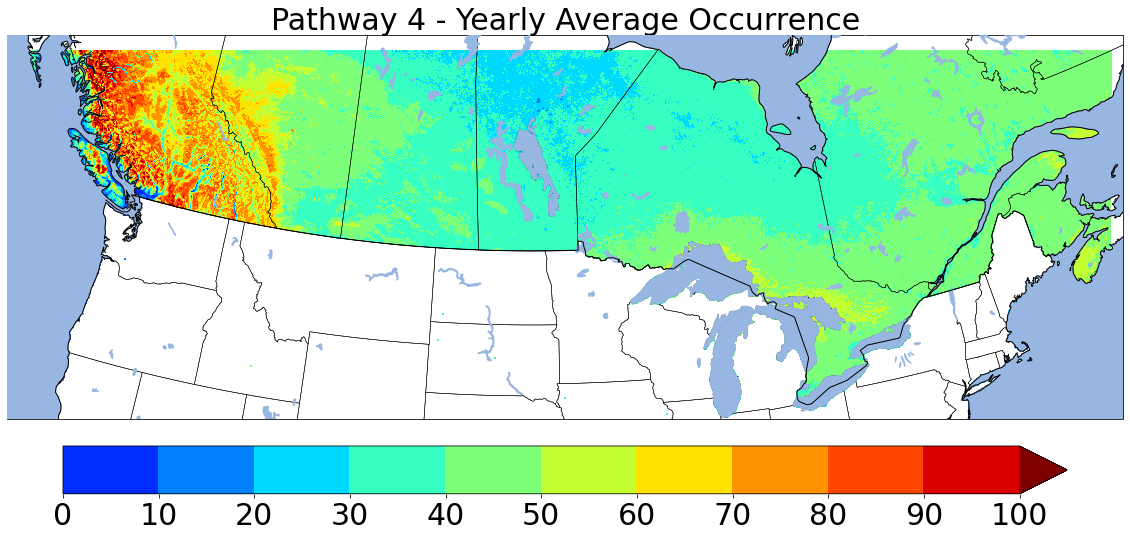

In [35]:
vmin = 0
vmax = 100
inc = 10
sim = '_CTRL'
pr = ''
plotPathway(f'p1{pr}{sim}_avg_v2.png', 'avg_p1', vmax, vmin, inc, 'Pathway 1 - Yearly Average Occurrence', '')
plotPathway(f'p2{pr}{sim}_avg_v2.png', 'avg_p2', vmax, vmin, inc, 'Pathway 2 - Yearly Average Occurrence', '')
plotPathway(f'p3{pr}{sim}_avg_v2.png', 'avg_p3', vmax, vmin, inc, 'Pathway 3 - Yearly Average Occurrence', '')
plotPathway(f'p4{pr}{sim}_avg_v2.png', 'avg_p4', vmax, vmin, inc, 'Pathway 4 - Yearly Average Occurrence', '')

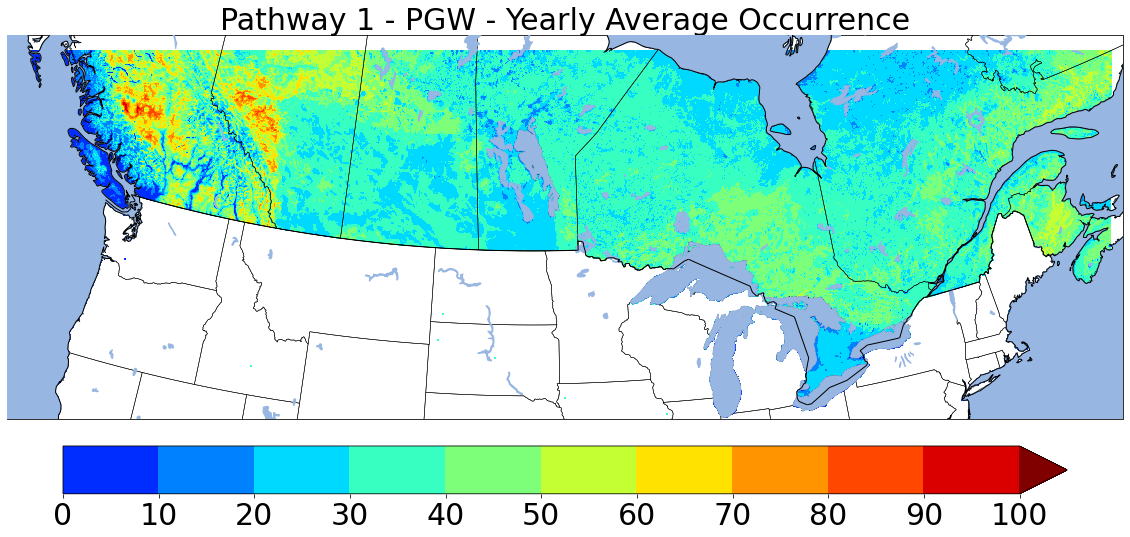

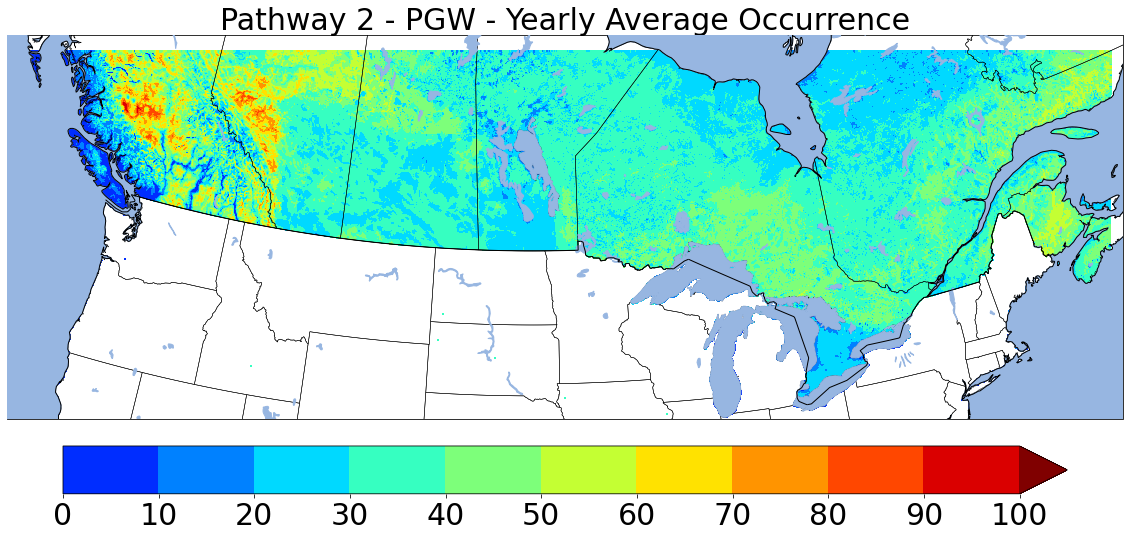

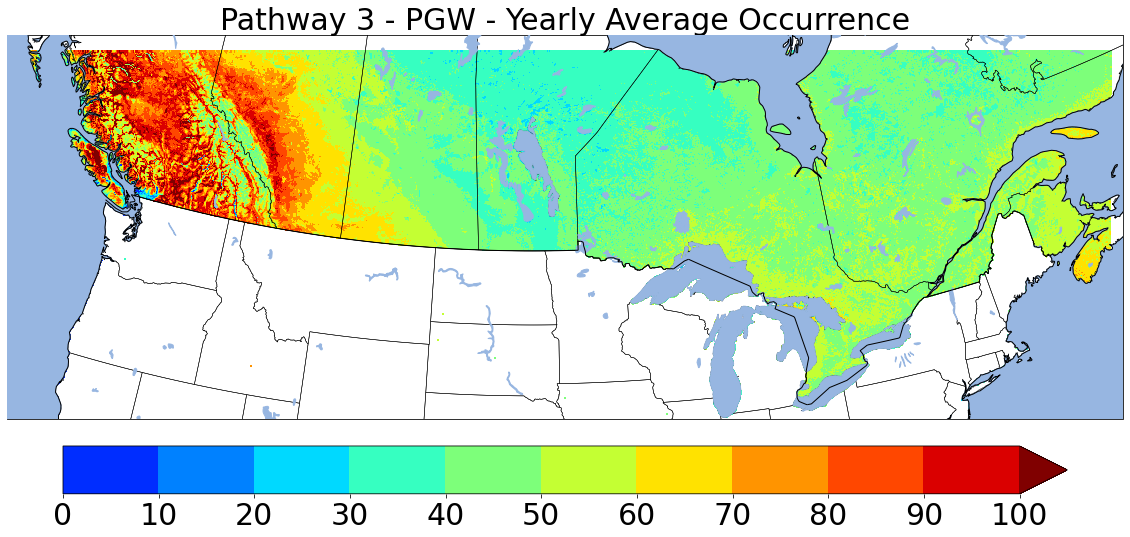

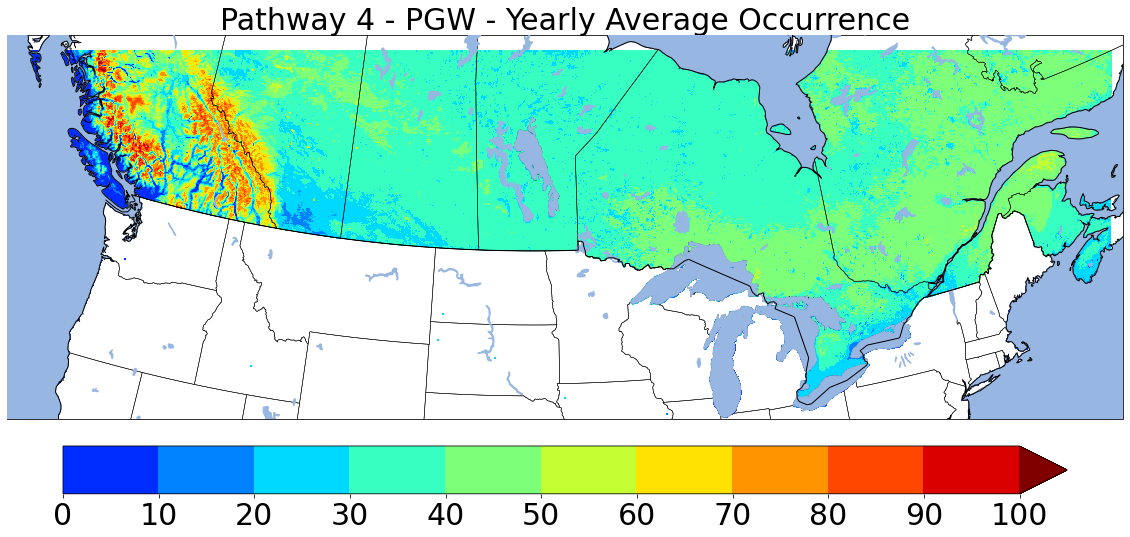

In [36]:
vmin = 0
vmax = 100
inc = 10
sim = '_PGW'
pr = ''
plotPathway(f'p1{pr}{sim}_avg_v2.png', 'avg_p1_pgw', vmax, vmin, inc, 'Pathway 1 - PGW - Yearly Average Occurrence', '')
plotPathway(f'p2{pr}{sim}_avg_v2.png', 'avg_p2_pgw', vmax, vmin, inc, 'Pathway 2 - PGW - Yearly Average Occurrence', '')
plotPathway(f'p3{pr}{sim}_avg_v2.png', 'avg_p3_pgw', vmax, vmin, inc, 'Pathway 3 - PGW - Yearly Average Occurrence', '')
plotPathway(f'p4{pr}{sim}_avg_v2.png', 'avg_p4_pgw', vmax, vmin, inc, 'Pathway 4 - PGW - Yearly Average Occurrence', '')

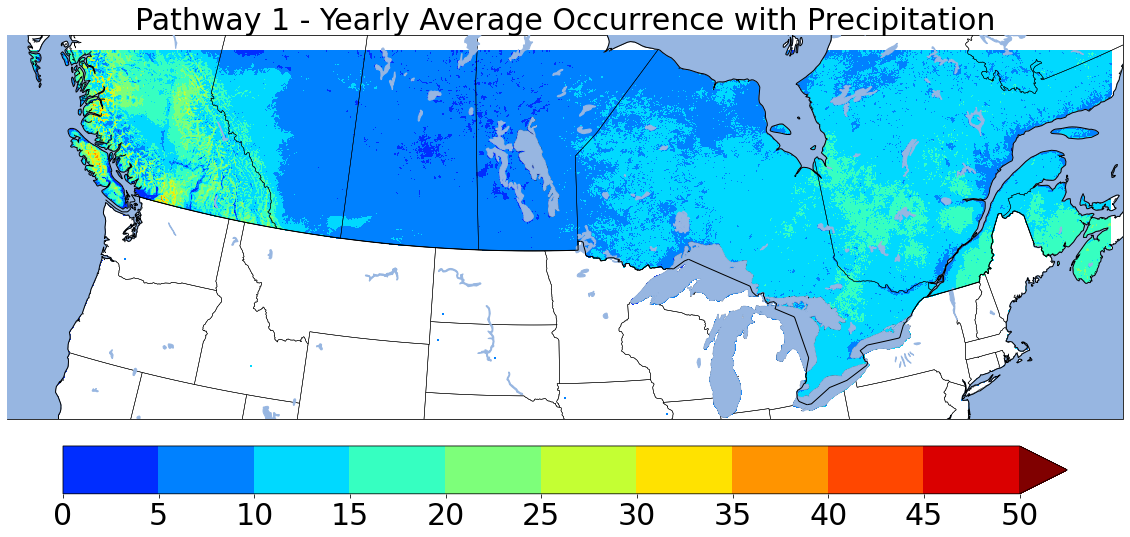

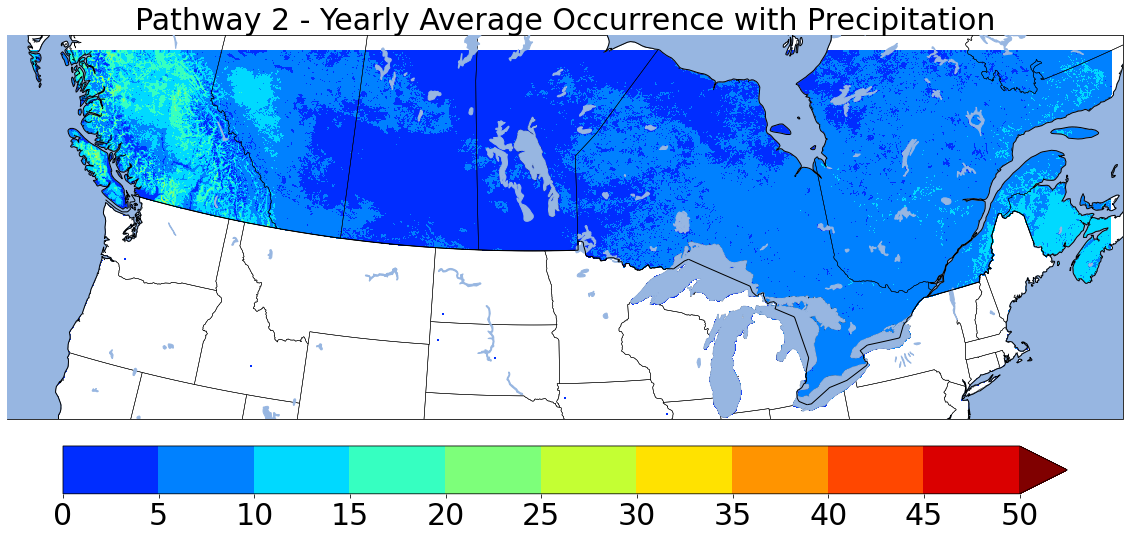

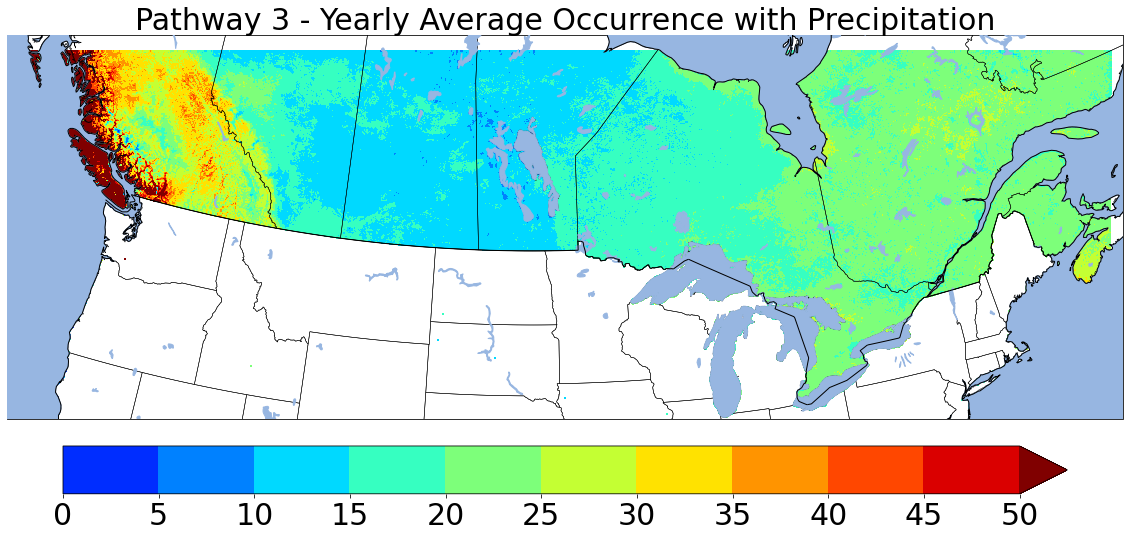

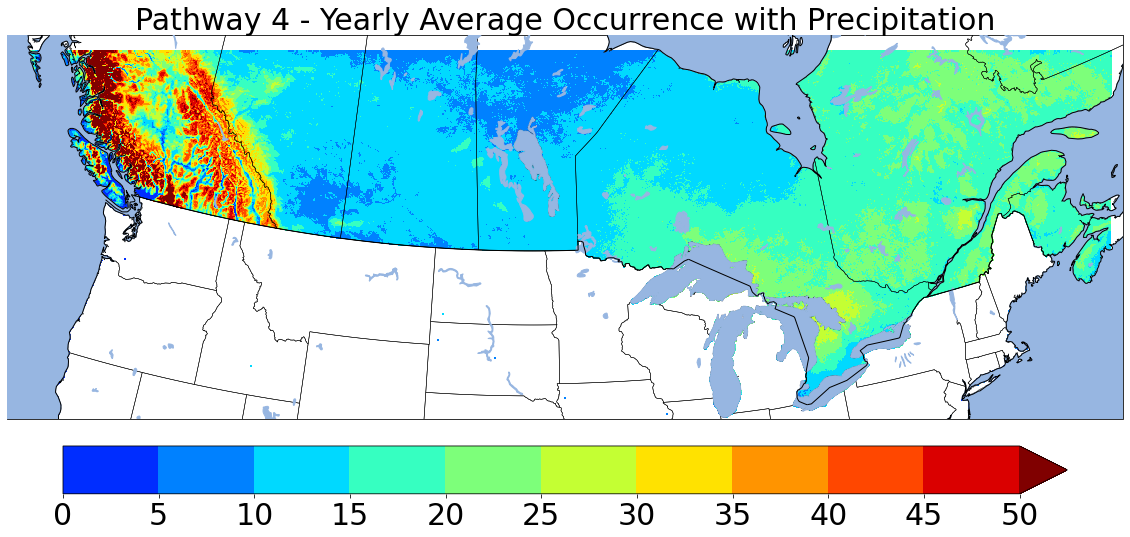

In [37]:
vmin = 0
vmax = 50
inc = 5
sim = '_CTRL'
pr = '_PR02'
plotPathway(f'p1{pr}{sim}_avg_v2.png', 'avg_p1_pr', vmax, vmin, inc, 'Pathway 1 - Yearly Average Occurrence with Precipitation', '')
plotPathway(f'p2{pr}{sim}_avg_v2.png', 'avg_p2_pr', vmax, vmin, inc, 'Pathway 2 - Yearly Average Occurrence with Precipitation', '')
plotPathway(f'p3{pr}{sim}_avg_v2.png', 'avg_p3_pr', vmax, vmin, inc, 'Pathway 3 - Yearly Average Occurrence with Precipitation', '')
plotPathway(f'p4{pr}{sim}_avg_v2.png', 'avg_p4_pr', vmax, vmin, inc, 'Pathway 4 - Yearly Average Occurrence with Precipitation', '')

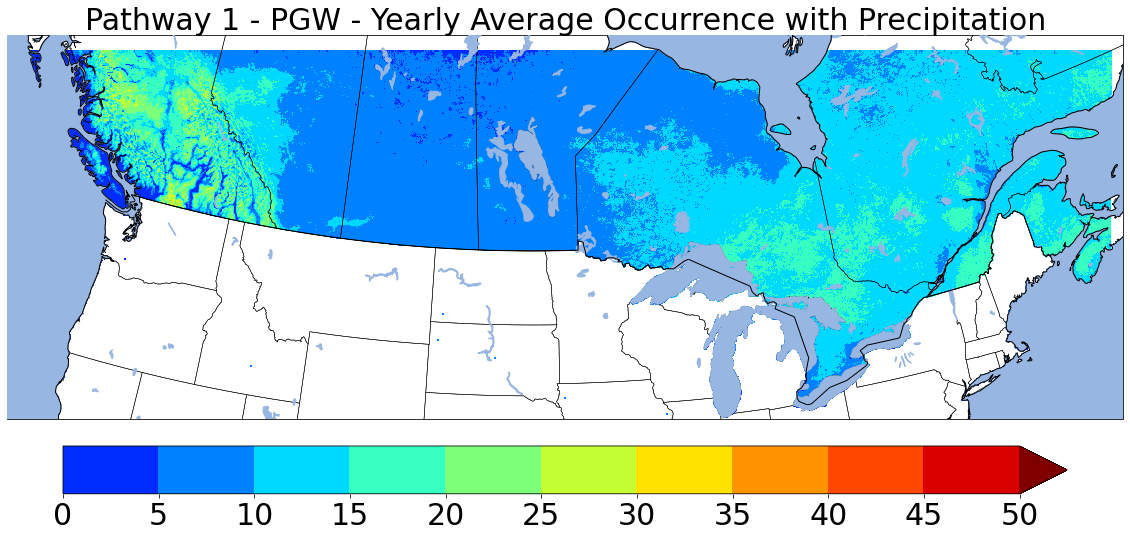

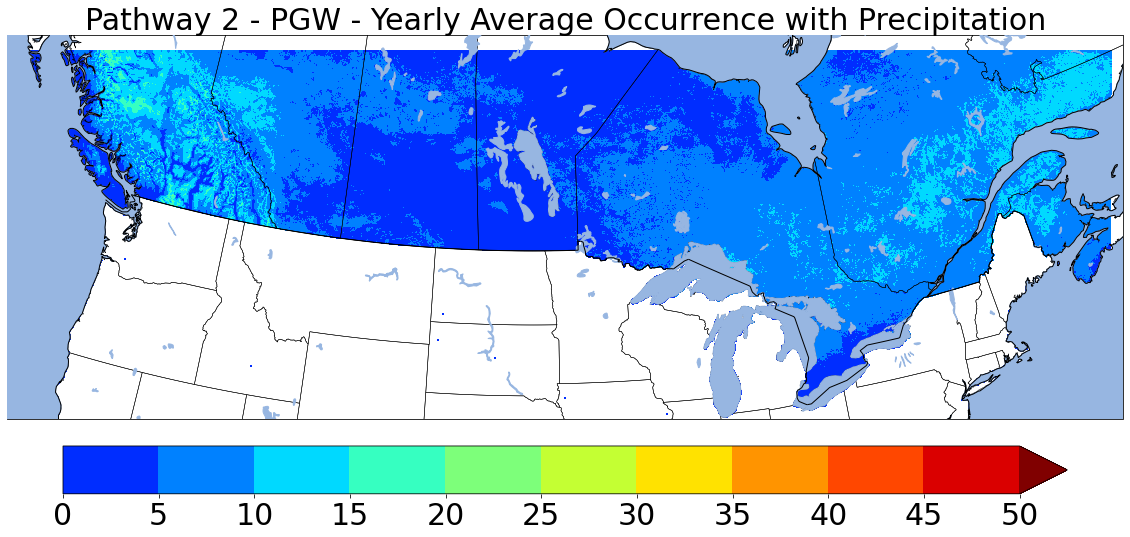

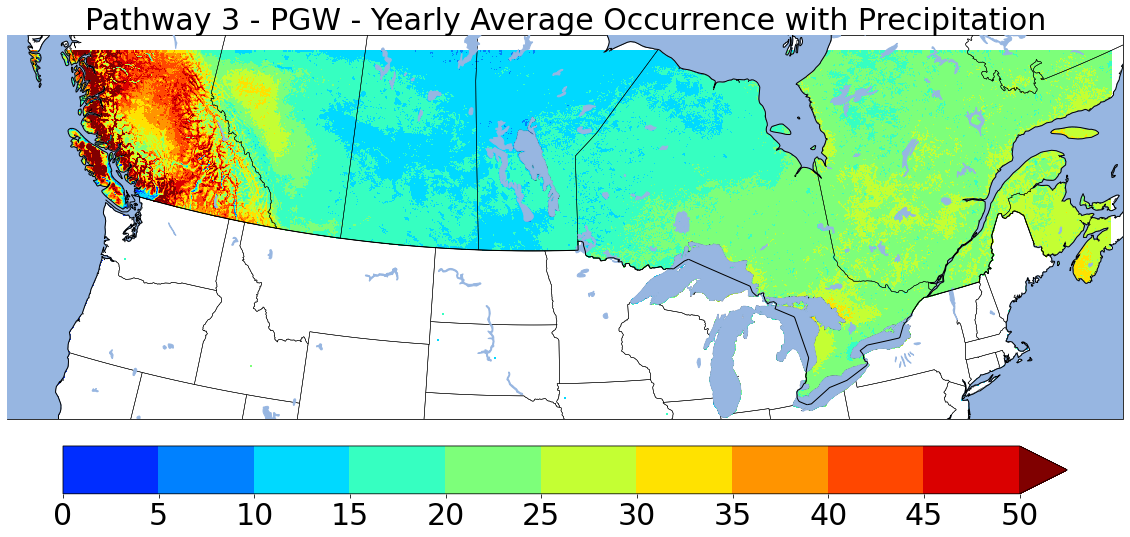

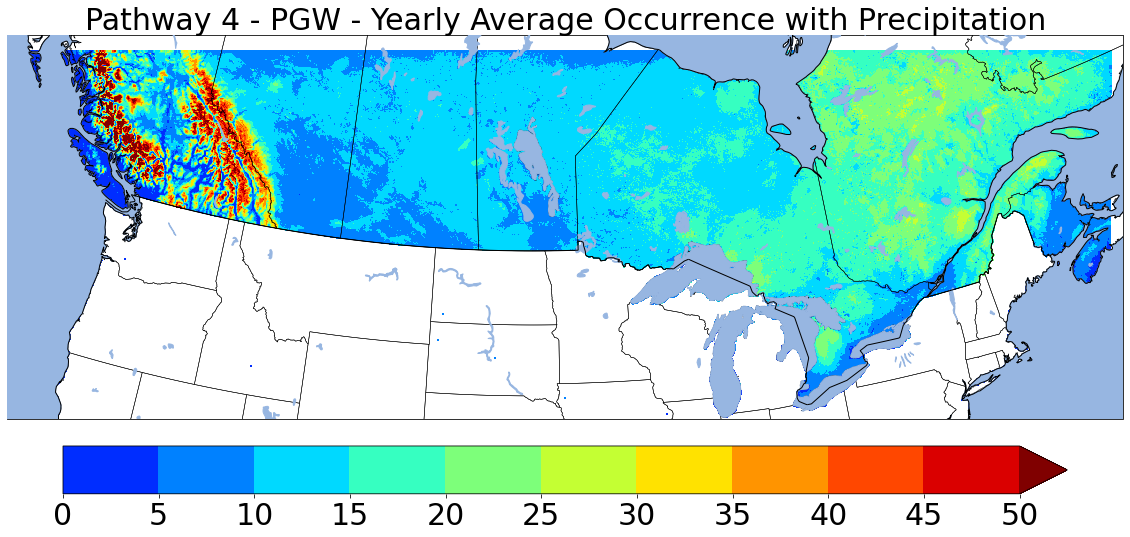

In [38]:
vmin = 0
vmax = 50
inc = 5
pr = '_PR02'
sim = 'PGW'
plotPathway(f'p1{pr}{sim}_avg_v2.png', 'avg_p1_pgw_pr', vmax, vmin, inc, 'Pathway 1 - PGW - Yearly Average Occurrence with Precipitation', '')
plotPathway(f'p2{pr}{sim}_avg_v2.png', 'avg_p2_pgw_pr', vmax, vmin, inc, 'Pathway 2 - PGW - Yearly Average Occurrence with Precipitation', '')
plotPathway(f'p3{pr}{sim}_avg_v2.png', 'avg_p3_pgw_pr', vmax, vmin, inc, 'Pathway 3 - PGW - Yearly Average Occurrence with Precipitation', '')
plotPathway(f'p4{pr}{sim}_avg_v2.png', 'avg_p4_pgw_pr', vmax, vmin, inc, 'Pathway 4 - PGW - Yearly Average Occurrence with Precipitation', '')

In [16]:
def plotPathway(filename, varname, vmax, vmin, vint, title, unit):
    myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

      # Making the subplots
    f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

    width = 1.0  
    new_cmap = 'viridis_r'
    new_cmap = mpl.cm.get_cmap("viridis_r")
    #new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
    #new_cmap.set_bad(color='white')

    val_max = vmax #np.max(aux1['total_day'].values)
    val_min = vmin
    val_int = vint
    #new_cmap = plt.cm.jet
    orig_cmap = plt.cm.jet
    clrs = orig_cmap(np.linspace(0.17, 1, 256))
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", clrs)
    #unit = "Days"
    #title = r"10-2000 to 09-2013 average number of days with near 0${\rm ^\circ C}$."

    #ax.set_extent([xll, xur-10, 36, yur])
    #ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
    ax.set_extent([xll-3.5, xur-9, 38.6, yur+2])

    ints = ( (val_max-val_min+val_int) / val_int)
    color_bnds  = np.linspace(val_min, val_max, int(ints))
    color_ticks = np.linspace(val_min, val_max, int(ints))
    norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
    # Plot figure
    cs = aux1[varname].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
               add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=vmin, vmax=val_max, extend='max')
    #cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
    #cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
    # Plot colorbar
    cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
    cb.ax.set_title(unit, fontsize=30)
    cb.ax.tick_params(labelsize=30) 
    # Plot title
    ax.set_title(title, fontsize=30)

    ax.coastlines(resolution='50m', linewidth=width, zorder=11)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=11)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    ax.add_feature(cfeature.OCEAN, zorder=10)
    ax.add_feature(cfeature.LAKES, zorder=10)
    

    #ax.set_title(f"Month: {i+1:02d}", fontsize=20)

    #plt.tight_layout()    
    #cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
    #cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
    #cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
    #cb.set_label('Number of Events', size=36)
    #cbar_ax.tick_params(labelsize=30) 

    plt.savefig(filename, facecolor='white', bbox_inches='tight')
    #plt.show()

In [10]:
def removeCorners(aux, n=25):
    aux[:n,:] = np.nan
    aux[:,:n] = np.nan
    aux[-n:,:] = np.nan
    aux[:,-n:] = np.nan
    
    return aux

In [17]:
def plotPathwayDiff(filename, varname1, varname2, vmax, vmin, vint, title, unit):
    myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

      # Making the subplots
    f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

    width = 1.0      

    val_max = vmax #np.max(aux1['total_day'].values)
    val_min = vmin
    val_int = vint
    #cor = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee090', "#ffffff", "#ffffff", '#e0f3f8', '#abd9e9', '#74add1', '#4575b4', '#313695']
    #new_cmap = mpl.colors.ListedColormap(cor)
    #new_cmap = plt.cm.jet
    #new_cmap=plt.cm.seismic
    new_cmap = plt.cm.coolwarm
    #unit = "Days"
    #title = r"10-2000 to 09-2013 average number of days with near 0${\rm ^\circ C}$."

    #ax.set_extent([xll, xur-10, 36, yur])
    #ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
    ax.set_extent([xll-3.5, xur-9, 38.6, yur+2])

    #num_levels = int((vmax-vmin+vint) / vint)
    num_levels = vint
    midpoint = 0
    levels = np.linspace(vmin, vmax, num_levels)
    midp = np.mean(np.c_[levels[:-1], levels[1:]], axis=1)
    vals = np.interp(midp, [vmin, midpoint, vmax], [0, 0.5, 1])
    #print(vals)
    cor = plt.cm.coolwarm(vals)
    vals2 = np.linspace(0,1,12)
    cor2 = plt.cm.coolwarm(vals2)
    new_cmap, norm = from_levels_and_colors(levels, cor)
    new_cmap.set_over(cor2[-1])
    new_cmap.set_under(cor2[0])
    #color_bnds  = np.linspace(val_min, val_max, int(ints))
    #color_ticks = np.linspace(val_min, val_max, int(ints))
    #norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
    # Plot figure
#    cs = (aux1[varname2]-aux1[varname1]).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#               add_colorbar=False, cmap=plt.cm.coolwarm, levels=levels, extend="both", vmin=vmin, vmax=val_max, norm=DivergingNorm(0))
    cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1[varname2].values-aux1[varname1].values, 
                       transform=ccrs.PlateCarree(),
                       cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
    #cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
    #cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
    # Plot colorbar
    cb = plt.colorbar(mappable=cs,ticks=levels,orientation="horizontal",pad=0.05,shrink=0.9, extend='both')
    cb.ax.set_title(unit, fontsize=30)
    cb.ax.tick_params(labelsize=30) 
    # Plot title
    ax.set_title(title, fontsize=30)

    ax.coastlines(resolution='50m', linewidth=width, zorder=11)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=11)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    ax.add_feature(cfeature.OCEAN, zorder=10)
    ax.add_feature(cfeature.LAKES, zorder=10)

    #ax.set_title(f"Month: {i+1:02d}", fontsize=20)

    #plt.tight_layout()    
    #cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
    #cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
    #cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
    #cb.set_label('Number of Events', size=36)
    #cbar_ax.tick_params(labelsize=30) 

    plt.savefig(filename, facecolor='white', bbox_inches='tight')
    #plt.show()

In [8]:
def geo_idx(dd, dd_array, type="lat"):
  '''
    search for nearest decimal degree in an array of decimal degrees and return the index.
    np.argmin returns the indices of minium value along an axis.
    so subtract dd from all values in dd_array, take absolute value and find index of minimum.
    
    Differentiate between 2-D and 1-D lat/lon arrays.
    for 2-D arrays, should receive values in this format: dd=[lat, lon], dd_array=[lats2d,lons2d]
  '''
  if type == "lon" and len(dd_array.shape) == 1:
    dd_array = np.where(dd_array <= 180, dd_array, dd_array - 360)

  if (len(dd_array.shape) < 2):
    geo_idx = (np.abs(dd_array - dd)).argmin()
  else:
    if (dd_array[1] < 0).any():
      dd_array[1] = np.where(dd_array[1] <= 180, dd_array[1], dd_array[1] - 360)

    a = abs( dd_array[0]-dd[0] ) + abs(  np.where(dd_array[1] <= 180, dd_array[1], dd_array[1] - 360) - dd[1] )
    i,j = np.unravel_index(a.argmin(), a.shape)
    geo_idx = [i,j]

  return geo_idx